In [1]:
from helpers.utilities import *
%run helpers/notebook_setup.ipynb

In [2]:
protein_levels_path = 'data/clean/protein/levels.csv'
clinical_data_path = 'data/clean/clinical/data.csv'

# outputs
aptamers_path = 'data/other/relevant_aptamers.csv'

# Proteins: exploration & quality control

Protein levels were measured with SOMAscan platform (SomaLogic company) in version measuring 1.3k proteins.

SOMAscan uses peptide aptamers (short, target specific protein fragments) binding for protein level quantification[1]:
 - designed for ~1.3k human proteins[1], with a newer version [capable of measuring ~5k human proteins](https://somalogic.com/somalogic-launches-new-version-somascan-assay/)
 - The company [claims](http://somalogic.com/wp-content/uploads/2017/06/SSM-002-Technical-White-Paper_010916_LSM1.pdf) achieving high dynamic range (10^8) and the readouts being directly proportional to protein concentrations
 - "Many of the proteins are either secreted or known to be shed from the cell surface, and thus the platform is particularly well suited for plasma biomarker discovery." [(Ngo, et al. 2016)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4963294/)

Were there any previous studies on related diseases, sample types (CSF as in contrast to blood), and validated for application to signal from (potentially) multiple organisms?
 - previously applied to other species (e.g. mouse)[1] - taking advantage of non-specificity to human proteins/close homology of some mammal proteins; the [company report](http://www.somalogic.com/wp-content/uploads/2016/09/SSM-019-Rev-4-SOMAmer-tech-note-nonhuman-sample.pdf) demonstrates that non-human orthologs from dog, rat, cat and mouse can be used to measure levels of certain proteins in these species    
 - previously applied to TB:
   - [Sequential inflammatory processes define human progression from M. tuberculosis infection to tuberculosis disease](https://journals.plos.org/plospathogens/article?id=10.1371/journal.ppat.1006687) - may be worth looking at as they also used both: SOMAscan and RNA-Seq data (plus the data are published in GEO!),
   - [Highly Multiplexed Proteomic Analysis of Quantiferon Supernatants To Identify Biomarkers of Latent Tuberculosis Infection](https://jcm.asm.org/content/55/2/391.long)
 - applications to CSF: [Neuro Psychiatric SLE patients (somehow related to meningitis)](http://www.jimmunol.org/content/200/1_Supplement/100.11) just an abstract!, [Alzheimer study](https://alzres.biomedcentral.com/articles/10.1186/s13195-017-0258-6) in which many differentially expressed pathways were in agreement with previous studies (which supports the case for application of SOMAscan to CSF).
 - The company [was developing some of its reagents](https://somalogic.com/somalogic-announces-extension-of-funding-for-devel/) specifically with intent to diagnose for TB for many years, which was funded by the Bill & Melinda Gates foundation.
 - The SOMAscan was qualified for use with CSF for biomarker discovery according to [the technical whitepaper](http://somalogic.com/wp-content/uploads/2017/06/SSM-002-Technical-White-Paper_010916_LSM1.pdf).
 
Technical validation and updates:
 - ["Assessment of Variability in the SOMAscan Assay", 2017](https://www.nature.com/articles/s41598-017-14755-5) report discusses the variability, data processing and normalization for SOMAscan, importantly sharing the data for variability. They compare performance on serum and plasma across multiple plates. 
 - According to the company that coefficient of variation in healthy humans has [median of 4.6% and 2.9% for plasma and serum respectively](http://somalogic.com/wp-content/uploads/2017/06/SSM-046-Rev-2-Verification-and-Validation-of-the-SOMAscan-Assay-1.3k.pdf) (n=166) which is consistent with the findings of above mentioned study
 - ["Complementarity of SOMAscan to LC-MS/MS and RNA-seq for quantitative profiling of human embryonic and mesenchymal stem cells", 2017](https://www.sciencedirect.com/science/article/pii/S1874391916304006) compares SOMAscan to traditional platforms. I have not read this one yet.
 - SomaLogic released updates, informing customers of removal and changes in the reagents[1]. An [update from 2016](https://metabolomics.helmholtz-muenchen.de/pgwas/locuscards/updates/SSM-064_Rev_0_DCN_16-263.pdf) explains removal of five reagents due to specificity issues
 - A [technical note from SomaLogic (2017)](http://www.somalogic.com/wp-content/uploads/2017/01/SSM-067-Rev-1-Technical-Note-Characterization-of-SOMAmer-Reagents-Binding-Specificity-in-the-SOMAscan-1.3k-Assay.pdf) characterizes specificity for the proteins in 1.3k panel; specificity measured against related proteins was confirmed for 53% of the reagents at the time. Not a bad number, but I believe that we need to be cautious as that did not test cross-species mixtures!
 - https://www.nature.com/articles/s41598-018-26640-w
 
Other useful resources:
 - [Web Tool for Navigating and Plotting SomaLogic ADAT Files](https://openresearchsoftware.metajnl.com/articles/10.5334/jors.166/) allow to visualize raw ADAT files (the files with raw data which I did not get); the website generates PCA, heatmaps for HCA and other plots and was originally hosted by NCI. Importantly there is a source code available to consult and trouble-shoot in case of any problems with SOMAscan-specific analysis/visualizations: https://github.com/foocheung/adat (Apache-2.0 license).

1. https://www.nature.com/articles/s41598-017-14755-5

**It might be useful to learn about the normalization procedures employed for SOMAscan.** What I would worry about is how they handled samples i.e. if these were placed on a single or multiple plates and what normalization followed. 

Overall the platform has a good performance but I am worried about the effect of non-specific binding of bacterial or viral proteins, which seems that was not tested before (the validation studies were all performed on healthy humans). On the other hand, if the signal for a protein is strong and discriminates TBM patients from other ones, it is a useful biomarker anyway (though with validity potentially restricted to this specific platform).

Articles addressing my concern of non-specific bacterial/fungal/viral protein binding:
 - [Potential of high-affinity, Slow Off-Rate Modified Aptamer (SOMAmer) reagents for Mycobacterium tuberculosis proteins as tools for infection models and diagnostic applications."](https://www.ncbi.nlm.nih.gov/pubmed/28794178) - attempted to create a diagnostic test for TB using novel aptamers (created specifically for Mycobacterium proteins); in serum/urine concentrations of TB proteins were too low - and this is a hint that I need not worry greatly (as even SomaLogic scientists were not able to pick up signal from MTB using novel aptamers), but again they did not try CSF nor did they systematically check the aptamers from the 1.3k assay for noise from unspecific binding)

I barely skimmed the topic, looking for things relevant to data cleaning and validation, will continue the review later.


In [3]:
protein_levels = read_csv(protein_levels_path, index_col=[0,1,2,3])

In [4]:
protein_levels

,,,,149.TMD,007.TMD,001.TMD,064.TMD,151.TMD,...,177.HC,189.HC,217.HC,221.HC,245.HC
soma_id,target_full_name,target,entrez_gene_symbol,,,,,,,,,,,
SL019100,E3 ubiquitin-protein ligase CHIP,CHIP,STUB1,174.1,521.1,57.0,158.1,62.1,...,12.6,11.4,12.2,15.8,22.2
SL007136,CCAAT/enhancer-binding protein beta,CEBPB,CEBPB,53.3,283.6,36.1,126.6,33.7,...,10.4,9.7,9.6,11.0,15.1
SL001731,Gamma-enolase,NSE,ENO2,11621.6,26883.3,10123.9,12015.4,3734.6,...,7699.7,5601.8,6421.7,8314.3,16016.8
SL019096,E3 SUMO-protein ligase PIAS4,PIAS4,PIAS4,50.9,177.8,31.6,75.3,25.5,...,11.0,10.7,9.6,10.8,17.0
SL005173,Interleukin-10 receptor subunit alpha,IL-10 Ra,IL10RA,174.6,385.3,116.8,192.7,104.0,...,50.2,46.9,44.9,53.3,82.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SL003066,Pigment epithelium-derived factor,PEDF,SERPINF1,185698.9,199804.1,193171.3,208650.7,215160.2,...,177535.0,192301.2,206157.5,226385.4,159321.2
SL008381,Cathepsin F,CATF,CTSF,951.8,2055.0,1290.1,1958.2,914.1,...,1535.7,1198.8,970.8,1465.3,2022.2
SL018900,Formimidoyltransferase-cyclodeaminase,FTCD,FTCD,52.1,161.3,27.3,70.2,20.8,...,21.2,19.7,18.6,18.4,21.2


### Can we get better ids for the proteins?

The Ensembl gene id is on the gene level so not necessarily accurate. Can we get better?

Yes: the aptamers metadata is available in R package "readat"

In [5]:
%%R -o aptamers
library(readat)

In [6]:
aptamers.head()

,AptamerId,SomaId,Target,TargetFullName,UniProt,...,Type,PlasmaDilution,SerumDilution,IsIn1310Panel,IsIn1129Panel
1,4829-43,SL001737,STRATIFIN,14-3-3 protein sigma,P31947,...,Protein,40.0,40.0,1,1
2,3804-66,SL007403,DMP1,Dentin matrix acidic phosphoprotein 1,Q13316,...,Protein,40.0,40.0,0,1
3,3814-63,SL007423,IL-11 RA,Interleukin-11 receptor subunit alpha,Q14626,...,Protein,40.0,40.0,0,1
4,14156-33,SL004815,14-3-3 protein beta/alpha,14-3-3 protein beta/alpha,P31946,...,Protein,1.0,1.0,1,0
5,7625-27,SL008071,14-3-3 protein theta,14-3-3 protein theta,P27348,...,Protein,1.0,1.0,1,0


In [7]:
relevant_aptamers = aptamers[
    aptamers.SomaId.isin(protein_levels.index.get_level_values('soma_id'))
    &
    (aptamers.IsIn1310Panel == 1)
]
len(relevant_aptamers)

1305

In [8]:
relevant_aptamers.to_csv(aptamers_path)

In [9]:
'7596-2' in relevant_aptamers.AptamerId

False

#### Were the five deprecated targets already excluded?

It would seem so as there are only 1305/1310 rows. See [SSM-064 Rev 0 DCN 16-263](https://metabolomics.helmholtz-muenchen.de/pgwas/locuscards/updates/SSM-064_Rev_0_DCN_16-263.pdf) for details.

In [10]:
deprecated_targets = ['2795-23', '3590-8', '5071-3', '5118-74', '5073-30']
relevant_aptamers.query('AptamerId in @deprecated_targets').empty

True

Just to make sure, I double-check using full names and the other data frame:

In [11]:
deprecated_target_names = [
    'Alkaline phosphatase, tissue-nonspecific isozyme',
    'Complement C1s subcomponent',
    'Reticulon-4',
    'Desmoglein-2',
    'Tumor necrosis factor receptor super-family member 25'
]
protein_levels.query('target_full_name in @deprecated_target_names').empty

True

Great!

#### The variability coefficients for confidence assessment of particular target measurements

The variability study[1] resulted in creation of a website: [foocheung.shinyapps.io/SOMACV3](https://foocheung.shinyapps.io/SOMACV3/) which enables checking the variability of measurements for each of the reagents.

Unfortunately, these data are only available for serum and plasma and I did not find an easy way to download the data in bulk.

### For which patients do have SOMAScan data?

In [12]:
protein_levels.columns.str.split('.').str[1].value_counts()

HC     25
CM     24
TMD    13
VM      7
TMR     7
TMS     6
dtype: int64

### Which target description is the best for visualisations?

In [13]:
protein_index = protein_levels.index
protein_indices = DataFrame({
    name: protein_index.get_level_values(name)
    for name in protein_index.names
})

In [14]:
protein_indices.apply(lambda index: index.str.len().max())

soma_id                 8
target_full_name      112
target                 40
entrez_gene_symbol     39
dtype: int64

For visualisation purposes I could use the Entrez or target symbols; Later I show that Entrez symbols are not unique, so I opt to use the target symbols.
SOMA ID is short, though not easy to interpret.

Note: The entrez gene symbols are not atomic, which is inherent to the protein biology (multiple genes coding for the same protein)

### Duplicates?

#### In the data

Chances of having exact duplicate in data are very low and this would be suspicious:

In [15]:
assert not protein_levels.duplicated().any()

#### In the indices?

In [16]:
protein_indices.apply(lambda index: index.duplicated().any())

soma_id               False
target_full_name      False
target                False
entrez_gene_symbol     True
dtype: bool

Entrez gene symbol is not unique.

In [17]:
from helpers.data_frame import extract_duplicates, set_duplicates_group

data_duplicates = extract_duplicates(protein_indices, ['entrez_gene_symbol'], ['target_full_name', 'target'])
data_duplicates = set_duplicates_group(data_duplicates, 'entrez_gene_symbol', protein_indices)

full_table(data_duplicates)

target_full_name  \
entrez_gene_symbol index                                                          
ADCYAP1            1      Pituitary adenylate cyclase-activating polypeptide 27   
                   2      Pituitary adenylate cyclase-activating polypeptide 38   
APOE               3      Apolipoprotein E                                        
                   4      Apolipoprotein E (isoform E3)                           
                   5      Apolipoprotein E (isoform E4)                           
                   6      Apolipoprotein E (isoform E2)                           
C3                 7      Complement C3b, inactivated                             
                   8      Complement C3                                           
                   9      C3a anaphylatoxin des Arginine                          
                   10     Complement C3b                                          
                   11     C3a anaphylatoxin                                       
                   12     Complement C3d fragment                                 
C4A C4B            13     Complement C4b                                          
                   14     Complement C4                                           
C5                 15     Complement C5                                           
                   16     C5a anaphylatoxin                                       
CCL23              17     C-C motif chemokine 23                                  
                   18     Ck-beta-8-1                                             
CLEC11A            19     Stem Cell Growth Factor-beta                            
                   20     Stem cell growth factor-alpha                           
EGFR               21     Epidermal growth factor receptor                        
                   22     Epidermal growth factor receptor variant III            
F10                23     Coagulation factor Xa                                   
                   24     Coagulation Factor X                                    
F2                 25     Thrombin                                                
                   26     Prothrombin                                             
F9                 27     Coagulation factor IX                                   
                   28     Coagulation factor IXab                                 
FGA FGB FGG        29     Fibrinogen                                              
                   30     D-dimer                                                 
FGF8               31     Fibroblast growth factor 8 isoform B                    
                   32     Fibroblast growth factor 8 isoform A                    
FN1                33     Fibronectin Fragment 3                                  
                   34     Fibronectin Fragment 4                                  
                   35     Fibronectin                                             
Human-virus        36     Protein E7_HPV16                                        
                   37     Protein E7_HPV18                                        
                   38     Protein Rev_HV2BE                                       
                   39     gp41 C34 peptide, HIV                                   
LTA LTB            40     Lymphotoxin alpha1:beta2                                
                   41     Lymphotoxin alpha2:beta1                                
LYN                42     Tyrosine-protein kinase Lyn, isoform B                  
                   43     Tyrosine-protein kinase Lyn                             
NPPB               44     Brain natriuretic peptide 32                            
                   45     N-terminal pro-BNP                                      
PLG                46     Angiostatin                                             
                   47     Plasmin                                              

Major observations:
  - Mostly isoforms in here - good to know!
  - There are viral proteins, e.g. "C34 gp41 HIV Fragment", "Protein Rev_HV2BE"

Please see further work on the Entrez id matching and gene-mapping in the [Gene_level_mapping.ipynb](Gene_level_mapping.ipynb) notebook.

### Quick check: do we see more of the HIV protein in patients with HIV?

In [18]:
clinical_data = read_csv(clinical_data_path, index_col=0)

Select only patients for whom the protein levels were measured:

In [19]:
clinical_for_protein_study = clinical_data.loc[protein_levels.columns]

In [20]:
patient_hiv_status = clinical_for_protein_study.HIVResult
is_healthy_control = clinical_for_protein_study.condition == 'HC'

As we assume that there are only HIV-1 patients, I expect to see a correlation for "C34 gp41 HIV Fragment" but not necessarily for other viral proteins

In [21]:
viral_proteins = protein_levels.query('entrez_gene_symbol == "Human-virus"')
viral_proteins

,,,,149.TMD,007.TMD,001.TMD,064.TMD,151.TMD,...,177.HC,189.HC,217.HC,221.HC,245.HC
soma_id,target_full_name,target,entrez_gene_symbol,,,,,,,,,,,
SL004697,Protein E7_HPV16,HPV E7 Type 16,Human-virus,51.0,201.5,39.4,76.6,29.7,...,14.8,11.6,13.8,12.4,20.1
SL004698,Protein E7_HPV18,HPV E7 Type18,Human-virus,117.7,682.7,68.3,199.2,87.9,...,28.1,30.6,28.4,25.7,31.5
SL000445,Protein Rev_HV2BE,HIV-2 Rev,Human-virus,20.5,48.5,19.7,32.5,13.8,...,13.0,14.6,13.3,11.6,14.8
SL016148,"gp41 C34 peptide, HIV",C34 gp41 HIV Fragment,Human-virus,212.9,368.4,347.6,261.4,105.7,...,183.5,92.3,130.2,174.2,416.8


In [22]:
df = viral_proteins.stack().reset_index().rename({'level_4': 'patient_id', 0: 'value'}, axis=1)

In [23]:
df['patient_hiv_status'] = df.patient_id.map(patient_hiv_status)
df['is_healthy_control'] = df.patient_id.map(is_healthy_control)

are there any HIV-1 positive healthy controls?

In [24]:
(is_healthy_control & (patient_hiv_status == 'Positive')).value_counts()

False    63
True     19
dtype: int64

In [25]:
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger

In [26]:
rpy2_logger.addFilter(lambda record: 'notch went outside hinges' in record.msg)

notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.


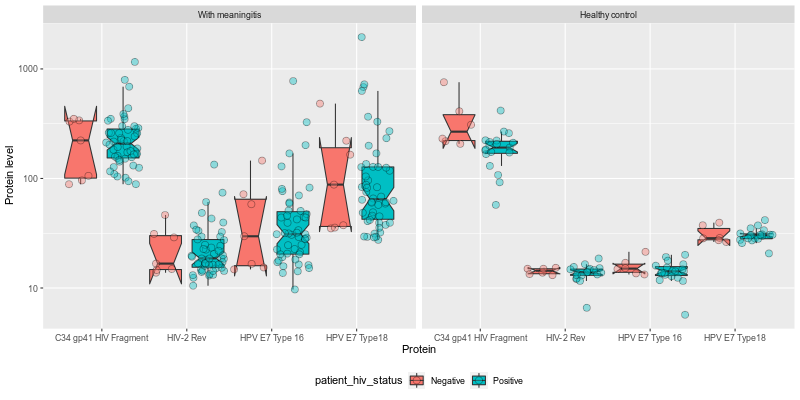

In [27]:
%%R -i df -w 800 -h 400 -u px
(
    ggplot(df, aes(x=target, y=value, fill=patient_hiv_status))
    + facet_wrap(
        ~ is_healthy_control,
        labeller=as_labeller(c('TRUE'='Healthy control', 'FALSE'='With meaningitis'))
    )
    + geom_boxplot(
        notch=TRUE, outlier.shape=NA,
        position=position_dodge(width=1)
    )
    + geom_point(
        shape=21, size=3, alpha=0.4,
        position=position_jitterdodge(dodge.width=1)
    )
    + xlab('Protein')
    + ylab('Protein level')
    + scale_y_log10()
    + theme(legend.position='bottom')
)

Surprisingly the assumed higher level of HIV fragments in HIV-positive patients is not clearly observed.

I will not jump to conclusions, though it might be interesting. Caveats:
 - this is just one HIV protein fragment
 - what is the reasonable detection level? Am I looking at experimental noise or meaningful data?
     - Median variability coefficients for the C34 qp41 HIV Fragment: 6.3% (https://foocheung.shinyapps.io/SOMACV3/)
 - it may be due to low specificity of the measurement for this fragment (i.e. there may be another, similar protein); also how specific is the platform/protocol when given a mixture of proteins from across different species? I mean, if they measured specificity with "clean" healthy human tissue, their specificity claims may be invalid in our setting, where patients may have severe bacterial and viral infections (all comes down to the lab protocol, I guess that I need to trust that someone has thought about that for now and revisit later).
 - this is CSF, no guarantee that we will have viruses in there, but according to the literature there is:
  - ["Discordance Between Cerebral Spinal Fluid and Plasma HIV Replication in Patients with Neurological Symptoms Who Are Receiving Suppressive Antiretroviral Therapy", 2010](https://academic.oup.com/cid/article/50/5/773/327515) - low sample size (11), studied RNA, but maybe relevant
  - ["Cerebrospinal fluid HIV infection and pleocytosis: Relation to systemic infection and antiretroviral treatment", 2005](https://bmcinfectdis.biomedcentral.com/articles/10.1186/1471-2334-5-98) - a larger sample size (100); the paper suggests mechanisms which may lead to occurrence of HIV in CSF: "transitory infection" (by infected CD4+ cells traversing from blood) which may lead to "autonomous infection" (with the HIV cycle being sustained in the CSF surrounding cells); Mycobacterium and Cryptococcus infections are highlighted as possible variation of the transitory infection. 
 - I have not finished checking/transforming the data this is just a preliminary check, which may suggest that there is more cleaning to do!

Questions: what test (precisely) was used to diagnose HIV? How sensitive is it? What was tested - blood?

One possible explanation: some patients do have HIV but were not diagnosed, some patients were diagnosed but do not have the virus in CSF, some patients were diagnosed and do have the virus in CSF (the values close to ~1000). In this case, level of ~100 would indicate just noise/non-specific binding in the data.


I will leave this for now, but an interesting thing would be to explore the relation between the bacterial and viral infections later on. Possible further steps include CD4 count and anti-retroviral therapy status inclusion. The lesson learned from a brief literature search is that the interplay between HIV status, CD4 count, and ARV therapy needs to be accounted for in the further analyses.
Also I could see if there are any known HIV biomarkers.

### Are the remianing proteins human?

In [28]:
set(relevant_aptamers.Organism)

{'Human',
 'Human papillomavirus type 16',
 'Human papillomavirus type 18',
 'isolate BEN',
 'isolate LW123'}

In [29]:
relevant_aptamers[relevant_aptamers.Organism != 'Human']

,AptamerId,SomaId,Target,TargetFullName,UniProt,...,Type,PlasmaDilution,SerumDilution,IsIn1310Panel,IsIn1129Panel
310,4792-51,SL016148,C34 gp41 HIV Fragment,"gp41 C34 peptide, HIV",Q70626,...,Protein,40.0,40.0,1,1
633,2769-3,SL000445,HIV-2 Rev,Protein Rev_HV2BE,P18093,...,Protein,40.0,40.0,1,1
640,2623-54,SL004697,HPV E7 Type 16,Protein E7_HPV16,P03129,...,Protein,40.0,40.0,1,1
641,2624-31,SL004698,HPV E7 Type18,Protein E7_HPV18,P06788,...,Protein,40.0,40.0,1,1


In [30]:
set(relevant_aptamers.Type)

{'Protein', 'Rat Protein'}

In [31]:
relevant_aptamers[relevant_aptamers.Type == 'Rat Protein']

,AptamerId,SomaId,Target,TargetFullName,UniProt,...,Type,PlasmaDilution,SerumDilution,IsIn1310Panel,IsIn1129Panel
226,5443-62,SL002505,ANP,Atrial natriuretic factor,P01160,...,Rat Protein,40.0,40.0,1,1
1160,5441-67,SL001761,Troponin I,"Troponin I, cardiac muscle",P19429,...,Rat Protein,40.0,40.0,1,1
1161,5440-26,SL004594,"Troponin I, skeletal, fast twitch","Troponin I, fast skeletal muscle",P48788,...,Rat Protein,40.0,40.0,1,1
1283,5437-63,SL001774,FABP,"Fatty acid-binding protein, heart",P05413,...,Rat Protein,1.0,1.0,1,0
